In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import StandardScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

dataset = pd.read_excel('/content/Ananthapuram.xlsx', header=0, index_col=0)
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

scaler = StandardScaler()
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, n_in=1, n_out=1)

n_features = dataset.shape[1]

reframed.drop(reframed.columns[range(n_features, n_features * 2 - 1)], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1  -0.623901        0.0  -0.001933  -1.525696  -0.015997  -0.112901   
2  -0.715316        0.0  -0.001933  -0.479017  -0.015997  -0.128610   
3  -0.794202        0.0  -0.001933  -0.324530  -0.015997  -0.120756   
4  -0.823436        0.0  -0.001933   0.135338  -0.015997  -0.097192   
5  -0.701395        0.0  -0.001933  -0.270639  -0.015997  -0.144320   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var14(t-1)  var15(t-1)  \
1   0.039102  -0.925177        0.0         0.0  ...         0.0   -0.349927   
2   0.039102  -0.925177        0.0         0.0  ...         0.0    0.612372   
3   0.039102  -0.925177        0.0         0.0  ...         0.0    0.612372   
4   0.039102  -0.925177        0.0         0.0  ...         0.0   -3.236827   
5   0.039102  -0.925177        0.0         0.0  ...         0.0    0.612372   

   var16(t-1)  var17(t-1)  var18(t-1)  var19(t-1)  var20(t-1)  var21(t-1)  \
1   -1.509400   -1.11

In [ ]:
values = reframed.values

n_train_days = 70

train = values[:n_train_days, :]
test = values[n_train_days:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(f"Train X shape: {train_X.shape}, Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}, Test y shape: {test_y.shape}")


Train X shape: (70, 1, 22), Train y shape: (70,)
Test X shape: (28, 1, 22), Test y shape: (28,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 3s - 3s/step - loss: 0.9261 - val_loss: 0.5752
Epoch 2/50
1/1 - 0s - 330ms/step - loss: 0.9130 - val_loss: 0.5644
Epoch 3/50
1/1 - 0s - 137ms/step - loss: 0.9001 - val_loss: 0.5537
Epoch 4/50
1/1 - 0s - 61ms/step - loss: 0.8871 - val_loss: 0.5429
Epoch 5/50
1/1 - 0s - 137ms/step - loss: 0.8744 - val_loss: 0.5325
Epoch 6/50
1/1 - 0s - 73ms/step - loss: 0.8622 - val_loss: 0.5223
Epoch 7/50
1/1 - 0s - 77ms/step - loss: 0.8500 - val_loss: 0.5122
Epoch 8/50
1/1 - 0s - 129ms/step - loss: 0.8378 - val_loss: 0.5023
Epoch 9/50
1/1 - 0s - 66ms/step - loss: 0.8259 - val_loss: 0.4925
Epoch 10/50
1/1 - 0s - 63ms/step - loss: 0.8141 - val_loss: 0.4829
Epoch 11/50
1/1 - 0s - 61ms/step - loss: 0.8024 - val_loss: 0.4738
Epoch 12/50
1/1 - 0s - 58ms/step - loss: 0.7907 - val_loss: 0.4648
Epoch 13/50
1/1 - 0s - 140ms/step - loss: 0.7789 - val_loss: 0.4566
Epoch 14/50
1/1 - 0s - 137ms/step - loss: 0.7672 - val_loss: 0.4485
Epoch 15/50
1/1 - 0s - 65ms/step - loss: 0.7555 - val_loss: 0.4403
Epoch 16/50

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Test RMSE: 9.530


In [ ]:
def forecast_next_steps(model, last_obs, scaler, steps=1):
    forecasts = []
    current_input = last_obs

    for _ in range(steps):
        yhat = model.predict(current_input, verbose=0)

        forecasts.append(yhat[0, 0])

        current_input = np.concatenate((current_input[:, :, 1:], yhat[:, np.newaxis, :]), axis=2)

    forecasts = np.array(forecasts).reshape(-1, 1)
    forecasts_scaled = np.concatenate((np.zeros((forecasts.shape[0], scaler.n_features_in_ - 1)), forecasts), axis=1)
    forecasts = scaler.inverse_transform(forecasts_scaled)[:, -1]

    return forecasts


In [ ]:
if len(test_X.shape) == 2:
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print("Reshaped test_X to 3D:", test_X.shape)

last_obs = test_X[-1]
last_obs = last_obs.reshape((1, test_X.shape[1], test_X.shape[2]))
print("Last observation shape:", last_obs.shape)

next_steps = forecast_next_steps(model, last_obs, scaler, steps=23)
print(f"Forecasted values for the next steps: {next_steps}")

Reshaped test_X to 3D: (28, 1, 22)
Last observation shape: (1, 1, 22)
Forecasted values for the next steps: [14.96916697 16.95381396 10.99461109 16.74279313 20.30077108 21.84009284
 18.94205121 19.63903944 23.33328902 25.87829774 18.48684889 20.34323787
 19.53952183 14.49166535 13.70697683 11.51319925  9.17889752 10.19539481
 10.35010914 11.03427299 12.65674489 10.86164014 11.10305442]


In [ ]:
saved_model_path = r"SIHJudge1.keras"
model.save(saved_model_path)

In [ ]:
data=pd.read_excel('/content/anantha.xlsx')
target=data['water con']

In [ ]:
tar=target

In [ ]:
err=(tar-next_steps)/tar
err

,water con
0,-0.767316
1,-2.661731
2,0.104673
3,-1.039317
4,0.172410
5,0.153485
6,0.091944
7,0.536924
8,0.377945
9,-0.353467


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plt.scatter(np.arange(1,24),err)
#plt.xlabel('Months')
#plt.ylabel('Error')
#plt.title('Error Rate')
#plt.show()

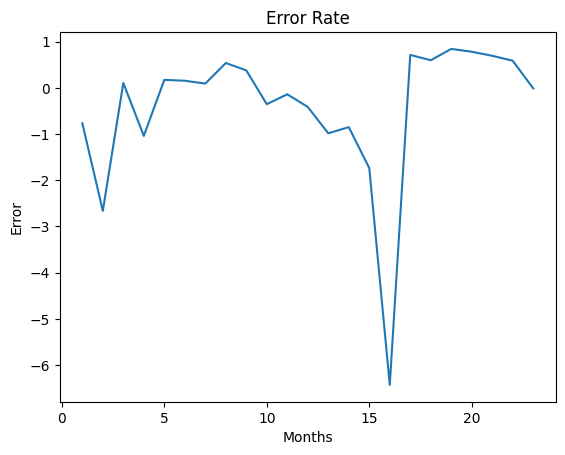

In [ ]:
plt.plot(np.arange(1,24),err)
plt.xlabel('Months')
plt.ylabel('Error')
plt.title('Error Rate')
plt.show()

In [ ]:
errp=err*100
round(errp.mean(),2)

-42.34

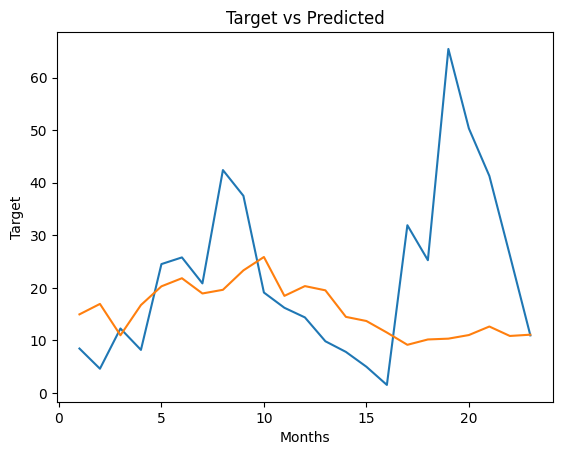

In [ ]:
plt.plot(np.arange(1,24),tar)
plt.plot(np.arange(1,24),next_steps)
plt.xlabel('Months')
plt.ylabel('Target')
plt.title('Target vs Predicted')
plt.show()